<a href="https://colab.research.google.com/github/meghsha1400/Mini-Project-Image-Classification/blob/master/Mini_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install bing-image-downloader

In [2]:
! pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 2.3MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
cd/content/drive/My Drive/SmartKnower ML Mini Project

/content/drive/My Drive/SmartKnower ML Mini Project


In [4]:
!mkdir images

In [5]:
cd images

/content/drive/My Drive/SmartKnower ML Mini Project/images


In [6]:
from bing_image_downloader import downloader
downloader.download('apple fruit',limit = 30,output_dir = 'pictures')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Honeycrisp.jpg/1200px-Honeycrisp.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Honeycrisp.jpg/1200px-Honeycrisp.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Honeycrisp.jpg/1200px-Honeycrisp.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from https://www.healthbenefitstimes.com/9/gallery/apple-1/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://muslimobserver.com/wp-content/uploads/2015/06/moghul_apple_photodune-513676-apple-m.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://dairyfoodblog.files.wordpress.com/2017/08/apple4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://3.bp.blogspot.com/-KvKsifQ2zGo/UJxIdXuEXTI/AAAAAAAAJho/oaCNMcTp4g0/s1600/apple+photo+sue3355.tistory.com+no+

In [7]:
from bing_image_downloader import downloader
downloader.download('mango Fruit',limit = 30,output_dir = 'pictures')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Mangoes_pic.jpg/1200px-Mangoes_pic.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-fiU1PIqnZMQ/T9c5Qzi8QbI/AAAAAAAACJM/y_Hs8LzO2JA/s1600/mango_king_of_fruits03_ripe.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://vespertunes.files.wordpress.com/2015/11/mango_hd_images_background.jpg?w=1400
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/-YV4OFTjuVLw/UYNTXuBgspI/AAAAAAAAI-I/0UmqH_XwiwY/s1600/Mango-18+new1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://drbaljotbharaj.files.wordpress.com/2013/04/ripe-mango-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://magnificentmaharashtra.files.wordpress.com/2015/05/mango-hd-wallpapers.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://grandbaby-cakes.com/wp-content/upload

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
# Reshaping and flattening of data
disp_pic = []
flat_pic = []
pic = []
path ='/content/drive/My Drive/SmartKnower ML Mini Project/images/pictures/'
for dirpath, dirnames, filenames in os.walk(path):
  for files in filenames:
    dis = dirpath.split('/')[-1]
    disp_pic.append(dis)
    img = imread(f'{path}{dis}/{files}')
    re_pic = resize(img,(100,100,3))
    flat_pic.append(re_pic.flatten())
    pic.append(re_pic)
flat_pic = np.array(flat_pic)
disp_pic = np.array(disp_pic)
pic= np.array(pic)

In [10]:
print(flat_pic)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.20196078 0.16666667 0.15098039 ... 0.11176471 0.09705882 0.05882353]
 [0.35294118 0.45490196 0.39413333 ... 0.29537255 0.32359216 0.16596078]
 [0.4894902  0.55937255 0.51890196 ... 0.51247059 0.69286275 0.42619608]]


In [11]:
#Creating DataFrame
df = pd.DataFrame(flat_pic)
df['Output'] = disp_pic
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Output
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,apple fruit
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,apple fruit
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,apple fruit
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,apple fruit
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,apple fruit

In [12]:
df['Output'].value_counts()

mango Fruit    30
apple fruit    30
Name: Output, dtype: int64

In [13]:
# Training and testing data.
x = df.drop('Output',axis=1).values
y = df['Output'].values

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [15]:
# Using gridsearch_cv for best param.
param= {'n_neighbors':np.arange(1,48)}
model = KNeighborsClassifier()
model_cv = GridSearchCV(model,param)
model_cv.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
model_cv.best_params_

{'n_neighbors': 3}

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
y_pred= model.predict(x_test)
y_pred

array(['apple fruit', 'mango Fruit', 'mango Fruit', 'apple fruit',
       'apple fruit', 'apple fruit', 'mango Fruit', 'mango Fruit',
       'mango Fruit', 'apple fruit', 'apple fruit', 'mango Fruit',
       'mango Fruit', 'mango Fruit', 'mango Fruit'], dtype=object)

In [19]:
y_test

array(['apple fruit', 'mango Fruit', 'mango Fruit', 'apple fruit',
       'apple fruit', 'apple fruit', 'mango Fruit', 'mango Fruit',
       'mango Fruit', 'apple fruit', 'apple fruit', 'apple fruit',
       'mango Fruit', 'mango Fruit', 'mango Fruit'], dtype=object)

In [20]:
# Knowing the accuracy of the model.
accuracy_score(y_test,y_pred)

0.9333333333333333

In [21]:
confusion_matrix(y_test,y_pred)

array([[6, 1],
       [0, 8]])

In [22]:
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,apple fruit,mango Fruit,All
Actual,,,
apple fruit,6,1,7
mango Fruit,0,8,8
All,6,9,15


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 apple fruit       1.00      0.86      0.92         7
 mango Fruit       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



array(['mango Fruit'], dtype=object)

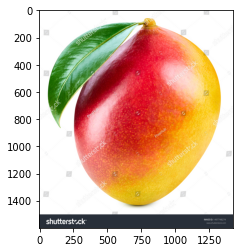

In [30]:
#Predicting for any new image
fl = []
i = imread('https://image.shutterstock.com/z/stock-photo-mango-isolated-on-white-background-ripe-mango-clipping-path-mango-with-leaf-1497748274.jpg')
re= resize(i,(100,100,3))
fl.append(re.flatten())
fl = np.array(fl)
plt.imshow(i)
y_pred = model.predict(fl)
y_pred